#ID0309 - Aprendizaje Estadístico

### Otoño 2023

### ID0309_Lab_3.4

**Enrique Naredo García**

<font size = 2>
©️ Todos los derechos reservados. All rights reserved.

*Nota: El presente documento es una herramienta diseñada única y exclusivamente para los estudiantes de la asignatura arriba mencionada. Se recuerda no compartir esta información fuera de los integrantes registrados en este curso. La reproducción total o parcial de este documento requiere autorización por escrito del titular del copyright.*
</font>

In [1]:
# importar librerías
import numpy as np
import matplotlib.pyplot as plt

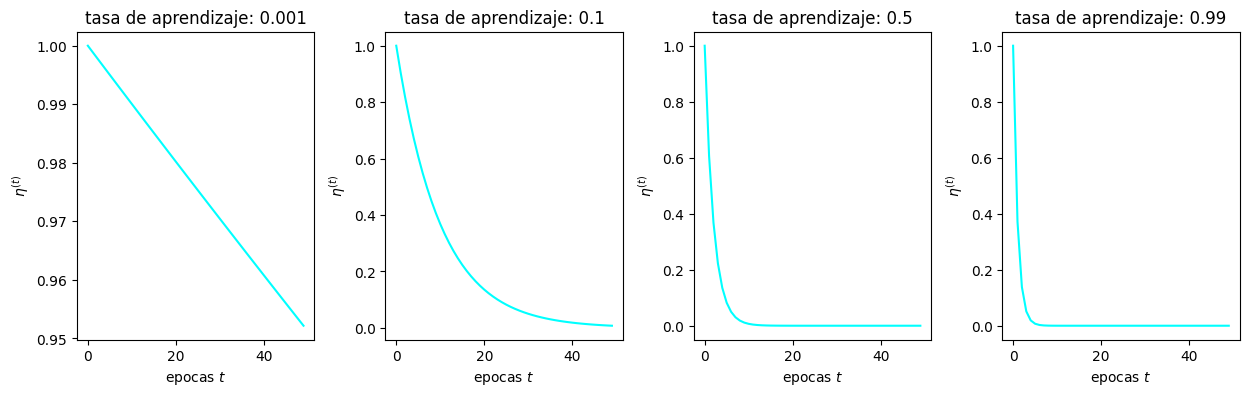

In [2]:
# figuras de decaimiento de tasa de aprendizaje
epochs = np.arange(0, 50)
lr_decay = [0.001, 0.1, 0.5, 0.99]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for decay, ind in zip(lr_decay, plt_ind):
    plt.subplot(ind)
    learn_rate = np.exp(-epochs * decay)
    plt.plot(epochs, learn_rate, c='cyan')
    plt.title('tasa de aprendizaje: ' + str(decay))
    plt.xlabel('epocas $t$')
    plt.ylabel('$\eta^{(t)}$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

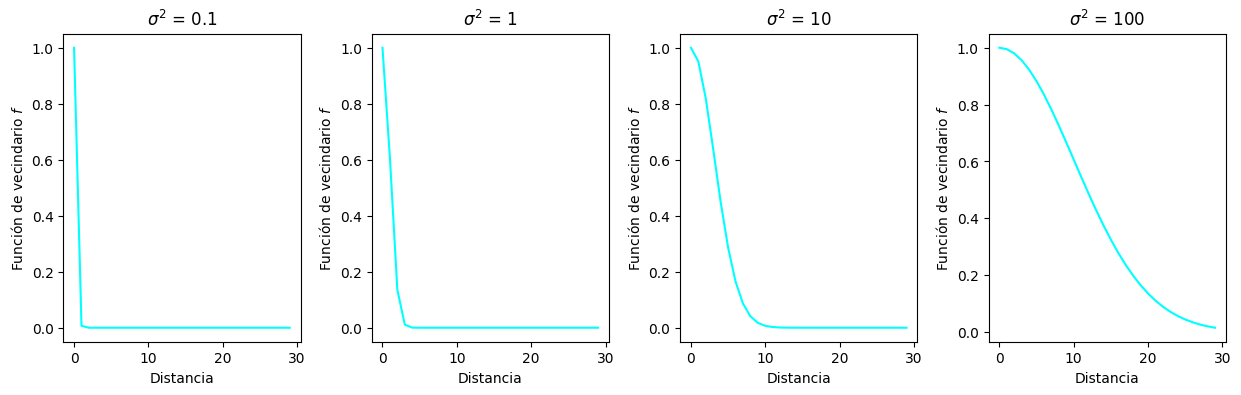

In [3]:
# figuras de función de vecindario
distance = np.arange(0, 30)
sigma_sq = [0.1, 1, 10, 100]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for s, ind in zip(sigma_sq, plt_ind):
    plt.subplot(ind)
    f = np.exp(-distance ** 2 / 2 / s)
    plt.plot(distance, f, c='cyan')
    plt.title('$\sigma^2$ = ' + str(s))
    plt.xlabel('Distancia')
    plt.ylabel('Función de vecindario $f$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [4]:
# unidad ganadora
# regresa el índice (g,h) de la unidad ganadora
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None),
             distSq.shape)

In [6]:
# actualización de pesos de la SOM
def update_weights(SOM, train_ex, learn_rate, radius_sq,
                   BMU_coord, step=3):
    g, h = BMU_coord
    # si el radio es cerca a cero entonces se cambia la BMU
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # cambia todas las celdas en un vecindario reducido de BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])
    return SOM

In [7]:
# rutina principal de SOM
def train_SOM(SOM, train_data, learn_rate = .1,
              radius_sq = 1, lr_decay = .1,
              radius_decay = .1, epochs = 10):
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex,
                                 learn_rate, radius_sq, (g,h))
        # actualización de la tasa de aprendizaje y el radio
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)
    return SOM

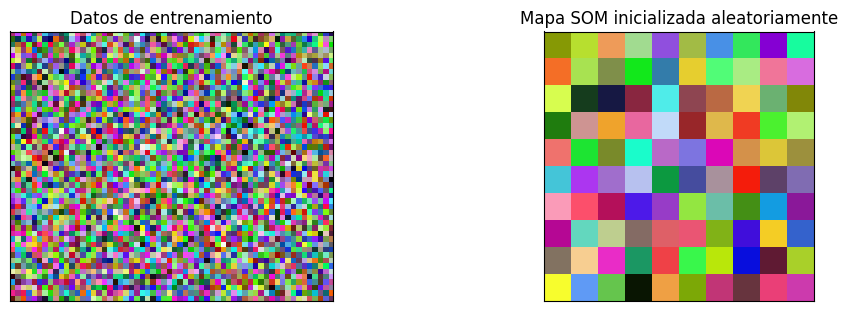

In [8]:
# dimensiones de la cuadricula de SOM
m = 10
n = 10
# número de muestras de entrenamiento
n_x = 3000
rand = np.random.RandomState(0)
# inicializa de datos de entrenamiento
train_data = rand.randint(0, 255, (n_x, 3))
# inicializa SOM aleatoriamente
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
# muestra tatno la matriz de entrenamiento y la cuadricula de SOM
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5),
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Datos de entrenamiento')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Mapa SOM inicializada aleatoriamente')

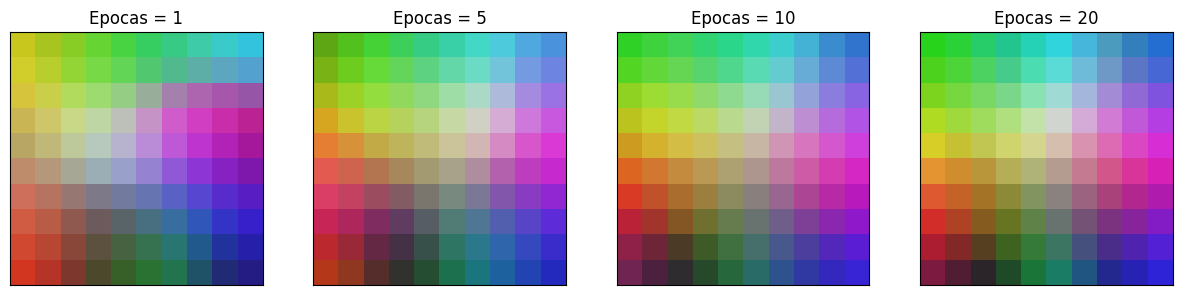

In [9]:
# figura SOM por epocas
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5),
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0

for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epocas = ' + str(total_epochs))

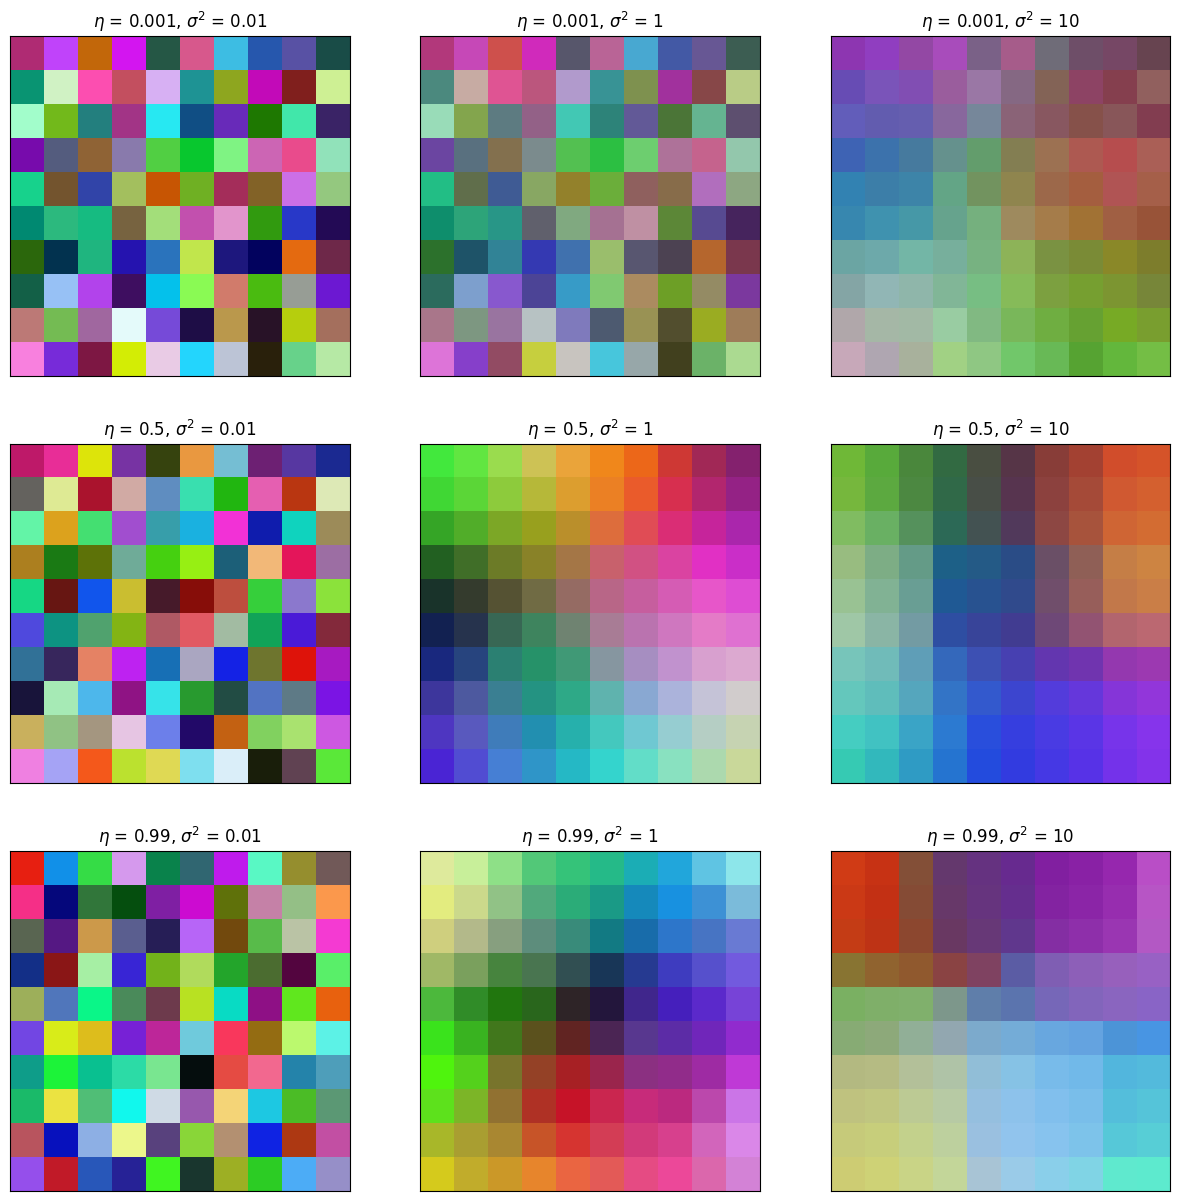

In [10]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15),
    subplot_kw=dict(xticks=[], yticks=[]))

# Mapa SOM inicializada aleatoriamente para el mismo estado
for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
  for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
    rand = np.random.RandomState(0)
    SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
    SOM = train_SOM(SOM, train_data, epochs = 5,
                    learn_rate = learn_rate,
                    radius_sq = radius_sq)
    ax[i][j].imshow(SOM.astype(int))
    ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) +
                            ', $\sigma^2$ = ' + str(radius_sq))